In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy.stats as sps

In [2]:
loan_data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

EXPLORATORY ANALYSIS

In [3]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
loan_data.shape

(5000, 14)

In [5]:
loan_data.isnull().values.all()

False

In [6]:
loan_data['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [7]:
loan_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
loantaken=loan_data[loan_data['Personal Loan']==1]
loanpredict=loan_data[loan_data['Personal Loan']==0]

Since there is no relation of Personal Loan with ID and ZIP code we can drop it

In [9]:
loan= loan_data.drop(loan_data[['ID','ZIP Code']], axis=1)

In [10]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


It can be observed that the experience is -ve which is not possible so we replace the experience by its absolute values

In [12]:
loan['Experience']= loan['Experience'].abs()
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [13]:
loan.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


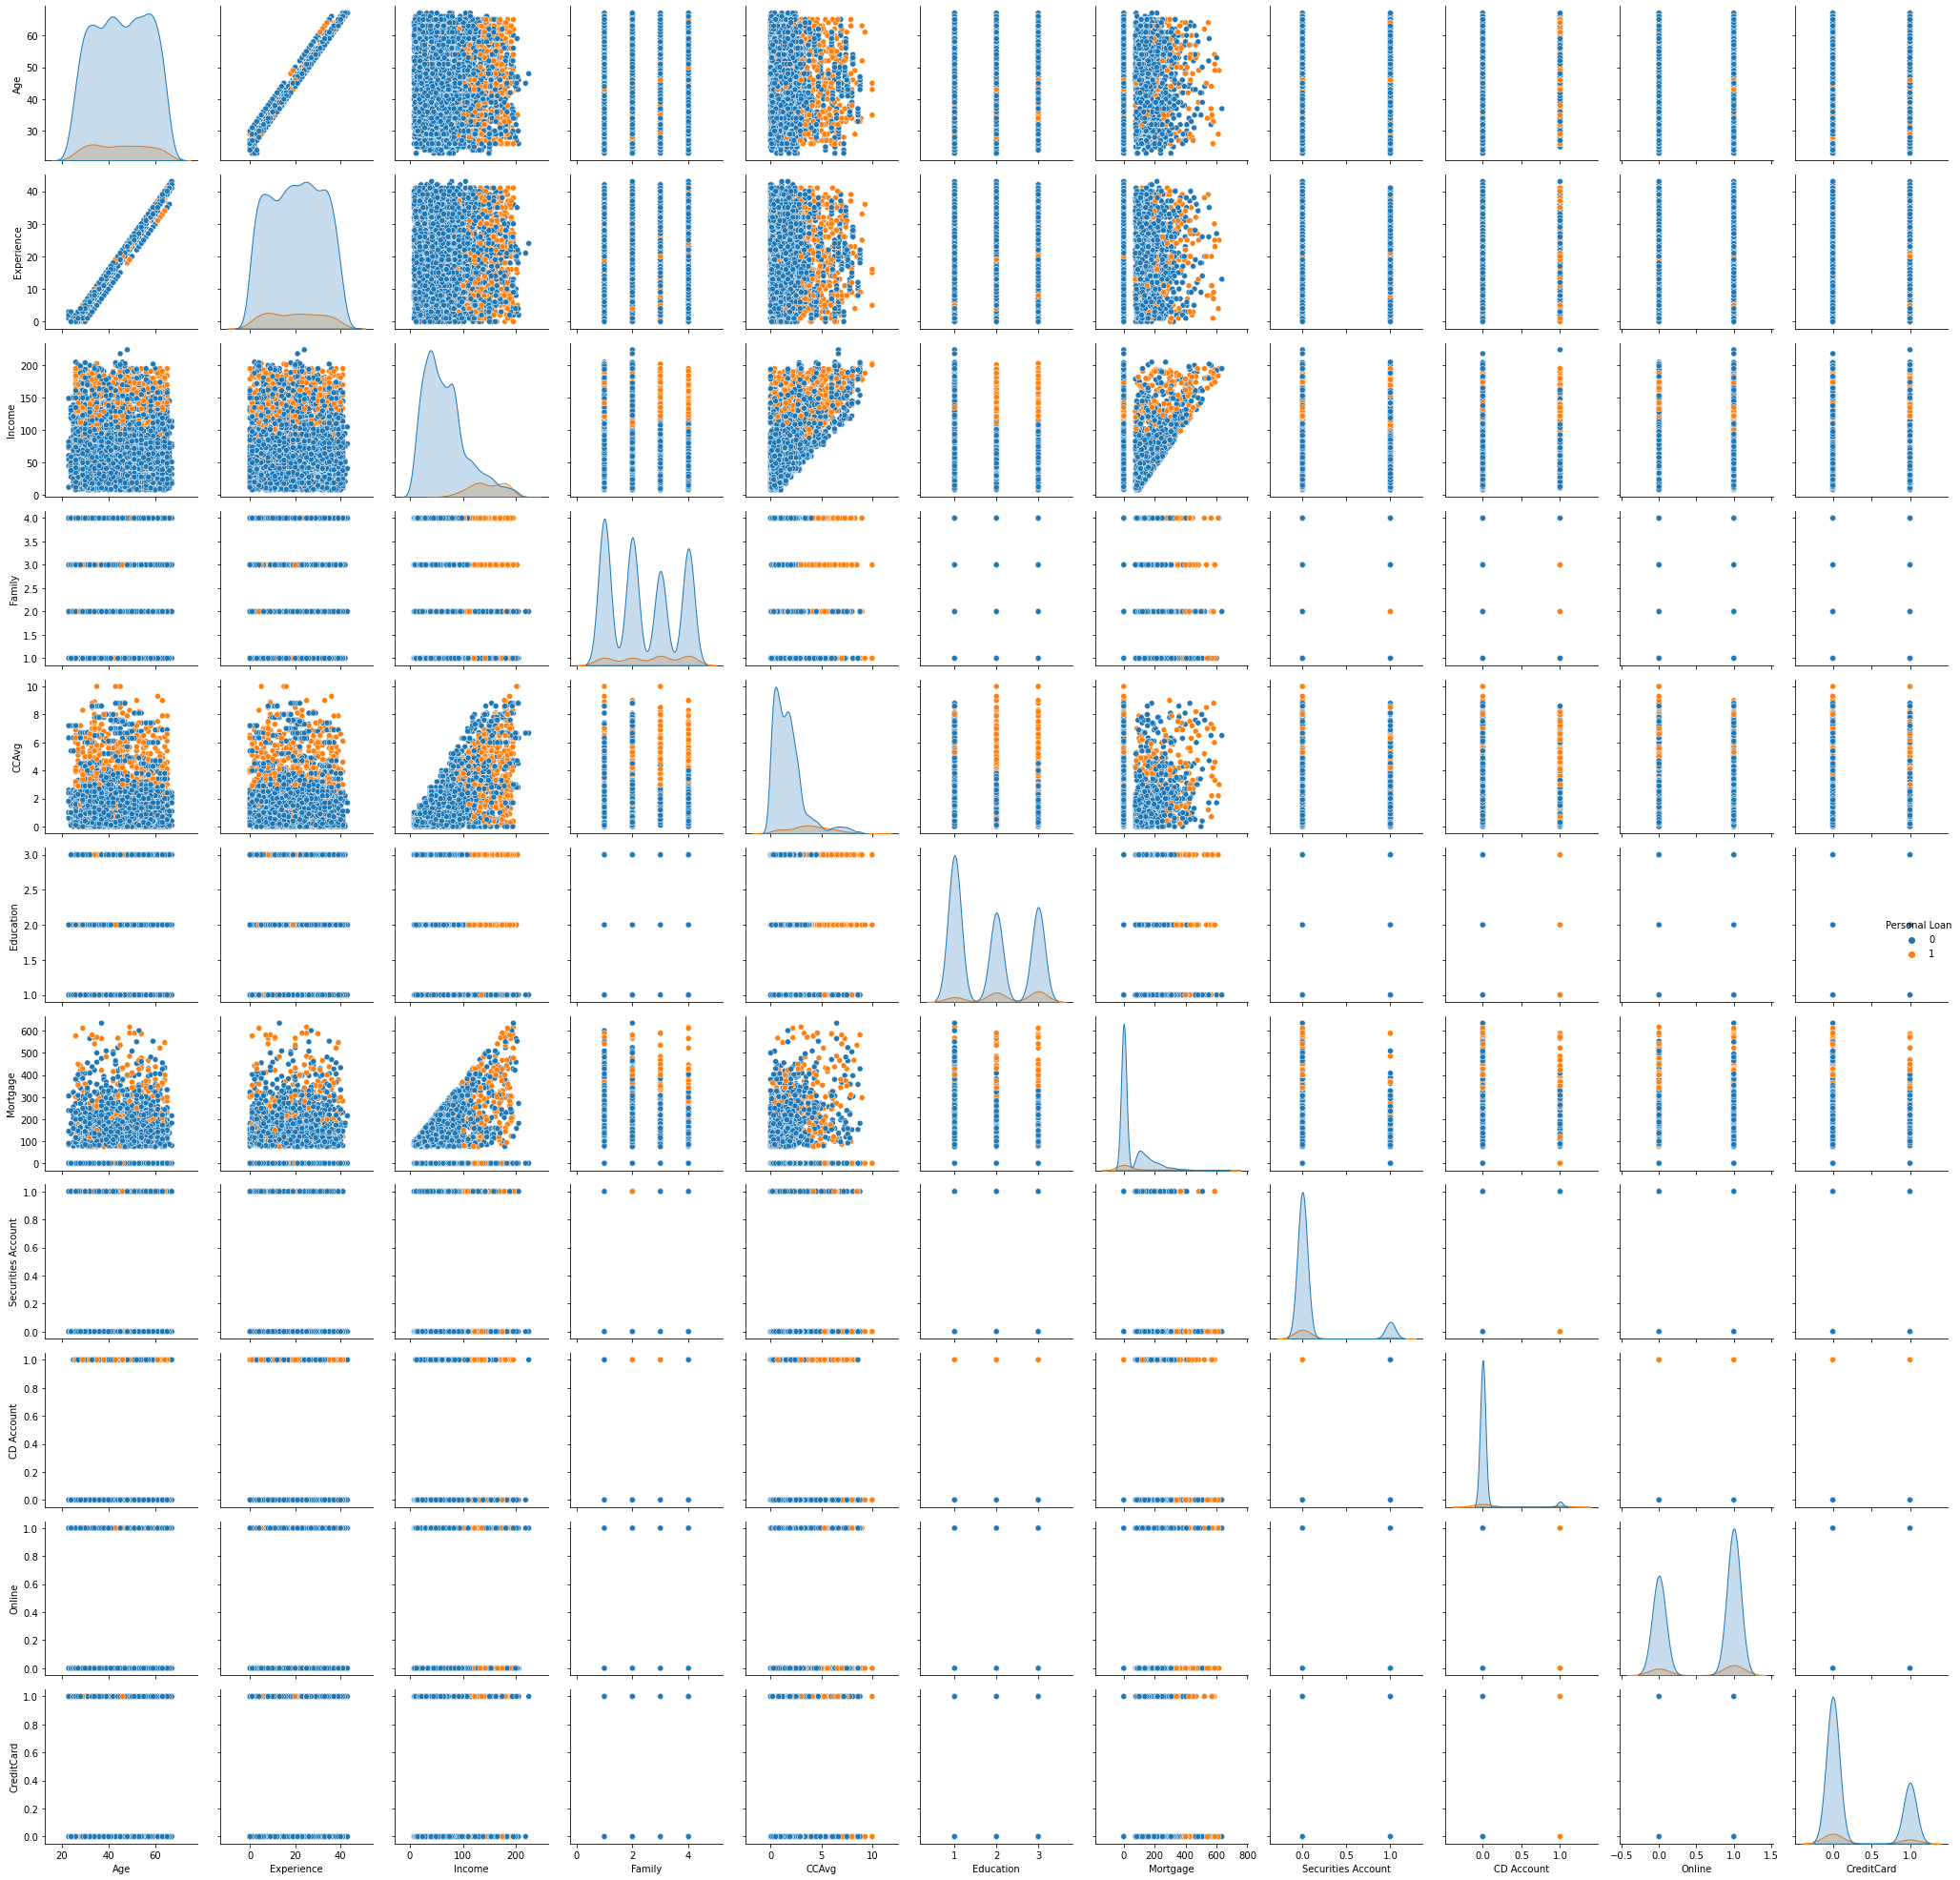

In [14]:
sns.pairplot(loan, diag_kind='kde', hue='Personal Loan')
plt.tight_layout()

In [15]:
corr1=loan.corr()

<Axes:>

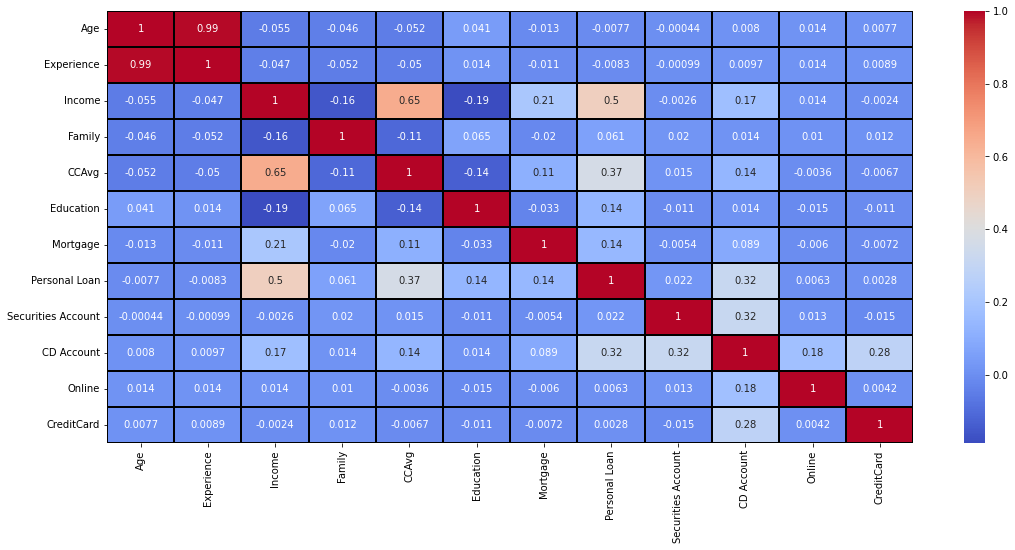

In [16]:
fig=plt.figure(figsize=(7,3))
fig.add_axes([0,0,2,2])
sns.heatmap(corr1, annot=True, cmap='coolwarm',linewidths=2, linecolor='black')

It can be seen from the pairplot and heatmap that Age and Experience are highly correlated                                       
Personal loan is related to (Income, CCAvg,Mortgage,CD Account)

Income influences CCAvg, Mortgage, Personal Loan and CD Account

CD Account is influences (Income, CCAvg, Personal Loan, Securities Account, online and credit card)




DATA VISUALIZATION

In [17]:
loan.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

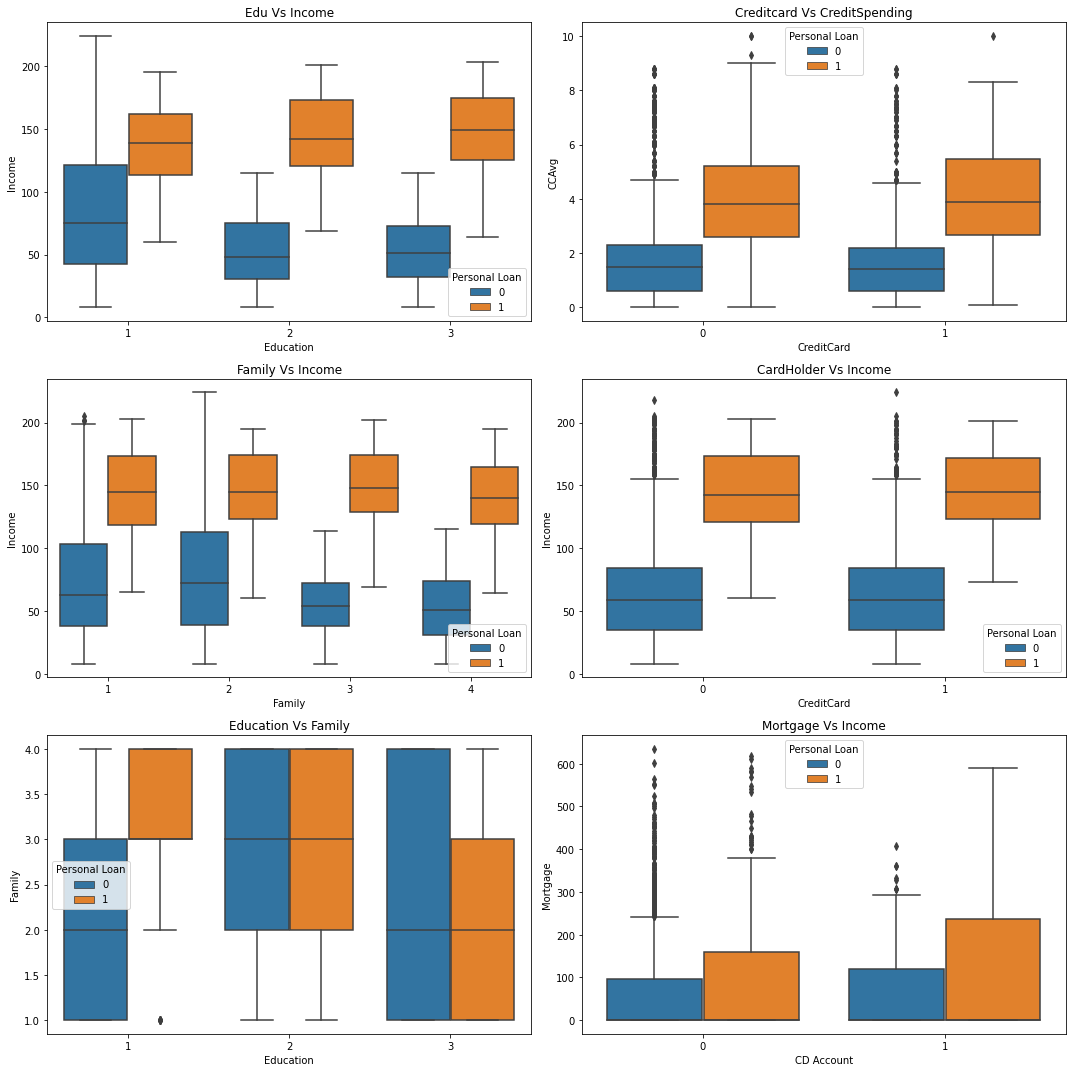

In [18]:
fig, axes=plt.subplots(nrows=3,ncols=2,figsize= (15,15))
sns.boxplot('Education','Income',hue='Personal Loan', data=loan, ax=axes[0][0])
axes[0][0].set_title('Edu Vs Income')
sns.boxplot('CreditCard','CCAvg',hue='Personal Loan', data=loan, ax=axes[0][1])
axes[0][1].set_title('Creditcard Vs CreditSpending')
sns.boxplot('Family','Income',hue='Personal Loan', data=loan, ax=axes[1][0])
axes[1][0].set_title('Family Vs Income')
sns.boxplot('CreditCard','Income',hue='Personal Loan', data=loan, ax=axes[1][1])
axes[1][1].set_title('CardHolder Vs Income')
sns.boxplot('Education','Family',hue='Personal Loan', data=loan, ax=axes[2][0])
axes[2][0].set_title('Education Vs Family')
sns.boxplot('CD Account','Mortgage',hue='Personal Loan', data=loan, ax=axes[2][1])
axes[2][1].set_title('Mortgage Vs Income')
plt.tight_layout()

It shows that undergraduate people with family size> 3 are good targets
Graduate and post graduate are good targets irrespictive of family size
Customers with CDAccount and have taken mortgage also are potential targets

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

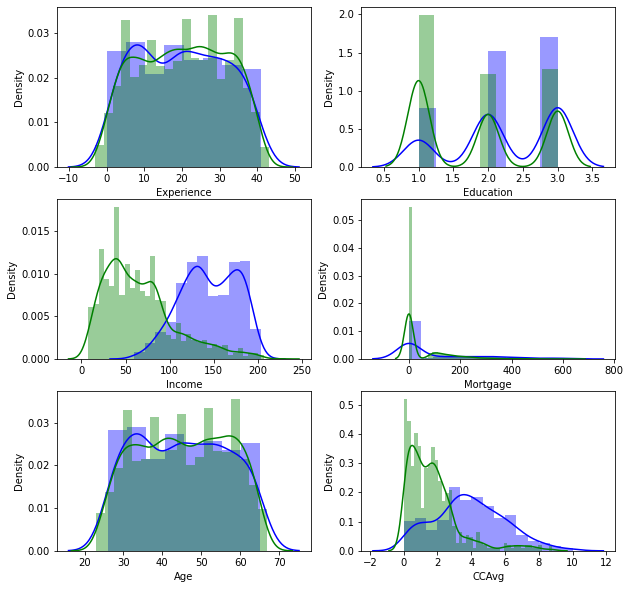

In [19]:
fig1,axes1=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
sns.distplot(loantaken['Experience'], color='blue', kde=True, ax=axes1[0][0])
sns.distplot(loanpredict['Experience'], color='green', kde=True,ax=axes1[0][0])
sns.distplot(loantaken['Education'], color='blue', kde=True,ax=axes1[0][1])
sns.distplot(loanpredict['Education'], color='green', kde=True,ax=axes1[0][1])
sns.distplot(loantaken['Income'], color='blue', kde=True,ax=axes1[1][0])
sns.distplot(loanpredict['Income'], color='green', kde=True,ax=axes1[1][0])
sns.distplot(loantaken['Mortgage'], color='blue', kde=True,ax=axes1[1][1])
sns.distplot(loanpredict['Mortgage'], color='green', kde=True,ax=axes1[1][1])
sns.distplot(loantaken['Age'], color='blue', kde=True,ax=axes1[2][0])
sns.distplot(loanpredict['Age'], color='green', kde=True,ax=axes1[2][0])
sns.distplot(loantaken['CCAvg'], color='blue', kde=True,ax=axes1[2][1])
sns.distplot(loanpredict['CCAvg'], color='green', kde=True,ax=axes1[2][1])

CHI-SQUARE ANALYSIS

H0 is personal loan has no relationship with incoming variable

Ha is personal loan is dependen on the incoming variable

In [20]:
loanchi=loan.copy()


In [21]:
def chi_test (P_loan, variable):
    ziplist=list(zip(loanchi[P_loan], loanchi[variable])) # zipping personal loan with other given variable
    dataframe=pd.DataFrame(ziplist,columns=(P_loan,variable))
    pivotlist=dataframe.reset_index().groupby([P_loan,variable]).count().reset_index()
    ContigencyTable=pivotlist.pivot(index=P_loan, columns=variable) # Preparing contingency Table
    chi2,p,dof,expected = sps.chi2_contingency(ContigencyTable, correction=False)
    print(f'CONTIGENCY TABLE \n {ContigencyTable}\n')
    print(f'chi2={chi2}, p is ={p}, with dof={dof},\n expected array\n {expected}')

In [22]:
loanchi['income_cat']=pd.cut(loan['Income'], 3, labels= ['low', 'medium', 'high'])# catagorizing Income as High, low and medium

In [23]:
loanchi['Education']=loanchi['Education'].replace({1:'undergrad', 2:'postgrad', 3:'prof'})

In [24]:
loanchi.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,income_cat
0,25,1,49,4,1.6,undergrad,0,0,1,0,0,0,low
1,45,19,34,3,1.5,undergrad,0,0,1,0,0,0,low
2,39,15,11,1,1.0,undergrad,0,0,0,0,0,0,low
3,35,9,100,1,2.7,postgrad,0,0,0,0,0,0,medium
4,35,8,45,4,1.0,postgrad,0,0,0,0,0,1,low


In [25]:
chi_test('Personal Loan', 'income_cat')

CONTIGENCY TABLE 
               index             
income_cat     high   low medium
Personal Loan                   
0               211  3121   1188
1               212     7    261

chi2=1235.2355081401383, p is =5.915854471032829e-269, with dof=2,
 expected array
 [[ 382.392 2827.712 1309.896]
 [  40.608  300.288  139.104]]


SINCE P value is <<0.001 we reject the null hypothesis and conclude that personal loan is dependent on Income

In [26]:
chi_test('Personal Loan', 'Education')

CONTIGENCY TABLE 
                  index                
Education     postgrad  prof undergrad
Personal Loan                         
0                 1221  1296      2003
1                  182   205        93

chi2=111.2398718738913, p is =6.991473868665428e-25, with dof=2,
 expected array
 [[1268.312 1356.904 1894.784]
 [ 134.688  144.096  201.216]]


SINCE P value is <<0.001 we reject the null hypothesis and conclude that personal loan is dependent on Education

In [27]:
chi_test('Education', 'Family')

CONTIGENCY TABLE 
           index               
Family        1    2    3    4
Education                     
postgrad    326  265  383  429
prof        468  374  278  381
undergrad   678  657  349  412

chi2=169.0117353911708, p is =7.287678569906404e-34, with dof=6,
 expected array
 [[413.0432 363.6576 283.406  342.8932]
 [441.8944 389.0592 303.202  366.8444]
 [617.0624 543.2832 423.392  512.2624]]


SINCE P value is <<0.001 we reject the null hypothesis and conclude that personal loan is dependent on Education

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Family'>

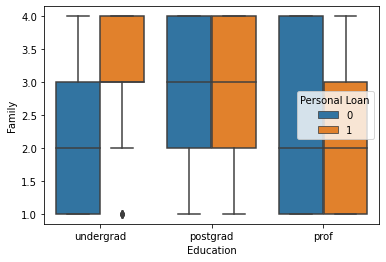

In [28]:
sns.boxplot('Education','Family',hue='Personal Loan', data=loanchi)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income_cat', ylabel='Mortgage'>

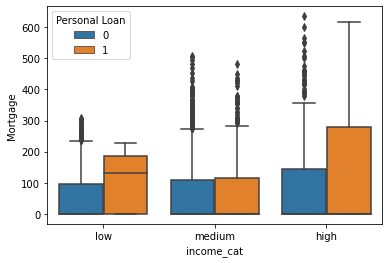

In [29]:
sns.boxplot('income_cat','Mortgage',hue='Personal Loan', data=loanchi)

MODEL BUILDING

In [30]:
X= loan.drop('Personal Loan', axis =1)
y = loan['Personal Loan']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state =10)

In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Fit the model on train
model= LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

coef_df=pd.DataFrame(model.coef_)
coef_df['intercept']= model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.381782  0.385686  0.051502  0.602805  0.094338  1.629041  0.000151   

          7         8         9        10  intercept  
0 -0.569941  3.173266 -0.747243 -0.944106  -2.782054  


In [32]:
model_score=model.score(X_test, y_test)
print(model_score)

0.9513333333333334


[[  88   52]
 [  21 1339]]


<AxesSubplot:>

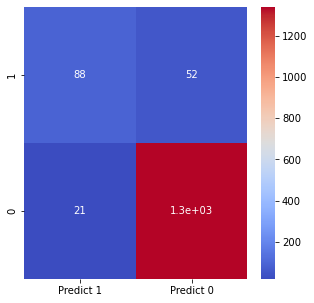

In [33]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=(1,0))
print(cm)
df_cm=pd.DataFrame(cm, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='coolwarm')

True Positive (TP): our model is correctly predicting 88 from testing data

True Negative (TN): our model correctly predicts that 1339 will not take loan

False Positive (FP): our model is incorrectly predicting that they will take loan (Type 1 error) 21

False Negative (FP): our model is incorrectly predicting that they will not take loan (Type 2 error) 52

In [34]:
y_test[y_test==1].count()

140

In [35]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_model= GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [36]:
naive_train_predict=naive_model.predict(X_train)
print("Model accuracy:{0:.4f}".format (metrics.accuracy_score(y_train,naive_train_predict)))

Model accuracy:0.8834


In [37]:
naive_test_predict= naive_model.predict(X_test)
print("Model accuracy:{0:.4f}".format (metrics.accuracy_score(y_test,naive_test_predict)))                                

Model accuracy:0.8800


[[  85   55]
 [ 125 1235]]


<AxesSubplot:>

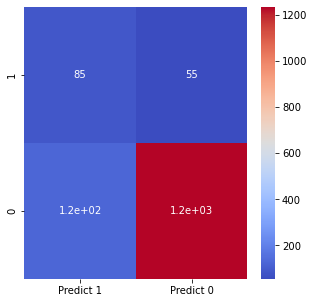

In [38]:
cm1=metrics.confusion_matrix(y_test, naive_test_predict, labels=[1,0])
print(cm1)
df_cm1=pd.DataFrame(cm1, index= [i for i in ["1","0"]], columns= [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm1, annot=True, cmap='coolwarm')

True Positive (TP): our model is correctly predicting 85 from testing data

True Negative (TN): our model correctly predicts that 1235 will not take loan

False Positive (FP): our model is incorrectly predicting that they will take loan (Type 1 error) 125

False Negative (FP): our model is incorrectly predicting that they will not take loan (Type 2 error) 55

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
NHH= KNeighborsClassifier(n_neighbors=5, weights='distance')

In [40]:
NHH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [41]:
NHH_predict=NHH.predict(X_test)
NHH.score(X_test, y_test)

0.91

[[  60   80]
 [  55 1305]]


<AxesSubplot:>

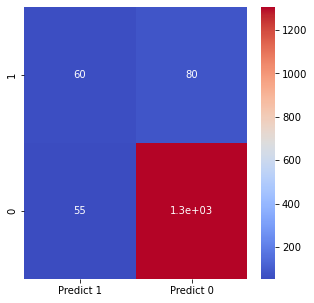

In [42]:
cm2=metrics.confusion_matrix(y_test, NHH_predict, labels=[1,0])
print(cm2)
df_cm2=pd.DataFrame(cm2, index= [i for i in ["1","0"]], columns= [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm2, annot=True, cmap='coolwarm')

True Positive (TP): our model is correctly predicting 60 from testing data

True Negative (TN): our model correctly predicts that 1305 will not take loan

False Positive (FP): our model is incorrectly predicting that they will take loan (Type 1 error) 55

False Negative (FP): our model is incorrectly predicting that they will not take loan (Type 2 error) 80


In [43]:
# FOR K ranging from 1-40
error_rate=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_i= knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error Rate')

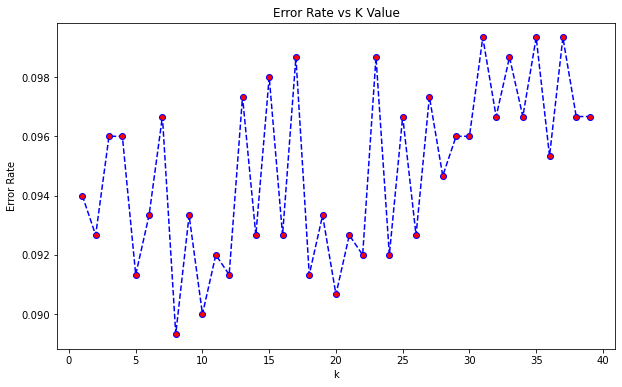

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [45]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred= knn.predict(X_test)
cm3=metrics.confusion_matrix(y_test, pred)
print(cm3)

[[1331   29]
 [ 105   35]]


<AxesSubplot:>

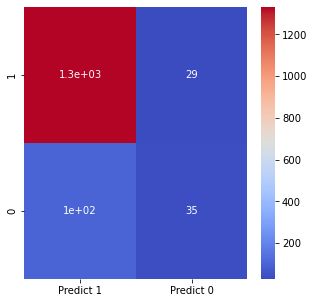

In [46]:
df_cm3=pd.DataFrame(cm3, index= [i for i in ["1","0"]], columns= [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm3, annot=True, cmap='coolwarm')

In [47]:
knn.score(X_test, y_test)

0.9106666666666666

CONCLUSION:


Logistic Regression is giving us the best result with 95% accuracy, as the Type 1 and Type 2
error is minimum in this case.